In [ ]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# add the latititudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

619

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the datetime module from the datetime library.
from datetime import datetime

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [8]:
# Import the datetime module from the datetime library.
from datetime import datetime

# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + "i"
    
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 13 | avarua
Processing Record 2 of Set 13 | port alfred
Processing Record 3 of Set 13 | waddan
Processing Record 4 of Set 13 | kousseri
Processing Record 5 of Set 13 | menongue
Processing Record 6 of Set 13 | mingoyo
Processing Record 7 of Set 13 | norrtalje
Processing Record 8 of Set 13 | nizhneyansk
City not found. Skipping...
Processing Record 9 of Set 13 | mar del plata
Processing Record 10 of Set 13 | rikitea
Processing Record 11 of Set 13 | henties bay
Processing Record 12 of Set 13 | cape town
Processing Record 13 of Set 13 | tasiilaq
Processing Record 14 of Set 13 | kawalu
Processing Record 15 of Set 13 | mataura
Processing Record 16 of Set 13 | amderma
City not found. Skipping...
Processing Record 17 of Set 13 | brokopondo
Processing Record 18 of Set 13 | guaruja
Processing Record 19 of Set 13 | kruisfontein
Processing Record 20 of Set 13 | yellowknife
Processing Record 21 of Set 13 | cornwa

Processing Record 40 of Set 16 | port hedland
Processing Record 41 of Set 16 | alghero
Processing Record 42 of Set 16 | ust-koksa
Processing Record 43 of Set 16 | lata
Processing Record 44 of Set 16 | macaboboni
City not found. Skipping...
Processing Record 45 of Set 16 | waipawa
Processing Record 46 of Set 16 | leningradskiy
Processing Record 47 of Set 16 | klyuchi
Processing Record 48 of Set 16 | tessalit
Processing Record 49 of Set 16 | chokurdakh
Processing Record 50 of Set 16 | tiksi
Processing Record 1 of Set 17 | fortuna
Processing Record 2 of Set 17 | ahipara
Processing Record 3 of Set 17 | vila franca do campo
Processing Record 4 of Set 17 | la ronge
Processing Record 5 of Set 17 | upernavik
Processing Record 6 of Set 17 | sitka
Processing Record 7 of Set 17 | aleksandrov gay
Processing Record 8 of Set 17 | conceicao da barra
Processing Record 9 of Set 17 | chara
Processing Record 10 of Set 17 | chenzhou
Processing Record 11 of Set 17 | sawtell
Processing Record 12 of Set 17 |

Processing Record 26 of Set 20 | provideniya
Processing Record 27 of Set 20 | mopipi
Processing Record 28 of Set 20 | talnakh
Processing Record 29 of Set 20 | muisne
Processing Record 30 of Set 20 | borlange
City not found. Skipping...
Processing Record 31 of Set 20 | quatre cocos
Processing Record 32 of Set 20 | namibe
Processing Record 33 of Set 20 | mackay
Processing Record 34 of Set 20 | palma di montechiaro
Processing Record 35 of Set 20 | faya
Processing Record 36 of Set 20 | angoche
Processing Record 37 of Set 20 | port hardy
Processing Record 38 of Set 20 | kalach-na-donu
Processing Record 39 of Set 20 | isangel
Processing Record 40 of Set 20 | srednekolymsk
Processing Record 41 of Set 20 | kourou
Processing Record 42 of Set 20 | baykit
Processing Record 43 of Set 20 | yeppoon
Processing Record 44 of Set 20 | matara
Processing Record 45 of Set 20 | meulaboh
Processing Record 46 of Set 20 | teya
Processing Record 47 of Set 20 | saint-augustin
Processing Record 48 of Set 20 | hor

Processing Record 12 of Set 24 | manjacaze
Processing Record 13 of Set 24 | kathmandu
Processing Record 14 of Set 24 | jalu
Processing Record 15 of Set 24 | egvekinot
Processing Record 16 of Set 24 | dedza
Processing Record 17 of Set 24 | llanes
Processing Record 18 of Set 24 | darab
Processing Record 19 of Set 24 | pedernales
Processing Record 20 of Set 24 | letterkenny
Processing Record 21 of Set 24 | borovoy
Processing Record 22 of Set 24 | chapais
Processing Record 23 of Set 24 | manicore
Processing Record 24 of Set 24 | homestead
Processing Record 25 of Set 24 | marawi
Processing Record 26 of Set 24 | sterling
Processing Record 27 of Set 24 | zhuhai
Processing Record 28 of Set 24 | mehran
Processing Record 29 of Set 24 | scarborough
Processing Record 30 of Set 24 | warrington
Processing Record 31 of Set 24 | keuruu
Processing Record 32 of Set 24 | nuuk
Processing Record 33 of Set 24 | golub-dobrzyn
Processing Record 34 of Set 24 | mwene-ditu
Processing Record 35 of Set 24 | biscar

In [9]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Avarua,-21.21,-159.78,77.00,69,100,9.17,CK,2020-10-30 01:27:16
1,Port Alfred,-33.59,26.89,60.62,67,100,14.27,ZA,2020-10-30 01:30:03
2,Waddan,29.16,16.14,58.15,74,65,6.51,LY,2020-10-30 01:26:02
3,Kousseri,12.08,15.03,77.00,33,0,8.05,CM,2020-10-30 01:30:03
4,Menongue,-14.66,17.69,66.47,73,64,3.09,AO,2020-10-30 01:30:04
5,Mingoyo,-10.10,39.63,75.20,88,40,1.23,TZ,2020-10-30 01:27:06
6,Norrtalje,59.76,18.70,48.99,92,13,2.80,SE,2020-10-30 01:30:04
7,Mar Del Plata,-38.00,-57.56,50.00,87,0,8.97,AR,2020-10-30 01:28:42
8,Rikitea,-23.12,-134.97,75.56,73,100,6.73,PF,2020-10-30 01:30:05
9,Henties Bay,-22.12,14.28,55.00,90,8,1.01,NA,2020-10-30 01:28:39


In [10]:
len(city_data)

575

In [11]:
new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
city_data_df = city_data_df[new_column_order]

city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Avarua,CK,2020-10-30 01:27:16,-21.21,-159.78,77.00,69,100,9.17
1,Port Alfred,ZA,2020-10-30 01:30:03,-33.59,26.89,60.62,67,100,14.27
2,Waddan,LY,2020-10-30 01:26:02,29.16,16.14,58.15,74,65,6.51
3,Kousseri,CM,2020-10-30 01:30:03,12.08,15.03,77.00,33,0,8.05
4,Menongue,AO,2020-10-30 01:30:04,-14.66,17.69,66.47,73,64,3.09
5,Mingoyo,TZ,2020-10-30 01:27:06,-10.10,39.63,75.20,88,40,1.23
6,Norrtalje,SE,2020-10-30 01:30:04,59.76,18.70,48.99,92,13,2.80
7,Mar Del Plata,AR,2020-10-30 01:28:42,-38.00,-57.56,50.00,87,0,8.97
8,Rikitea,PF,2020-10-30 01:30:05,-23.12,-134.97,75.56,73,100,6.73
9,Henties Bay,NA,2020-10-30 01:28:39,-22.12,14.28,55.00,90,8,1.01


In [12]:
# Create the output file (CSV).
output_data_file = 'weather_data/cities.csv'
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

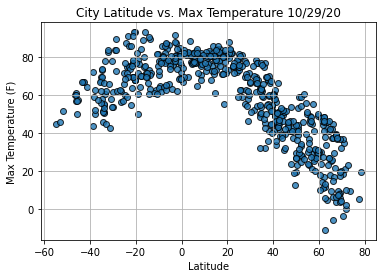

In [15]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today
# Build the scatter plot for latitude vs, max temperature.
plt.scatter(lats, 
            max_temps,
            edgecolor='black', linewidths=1, marker='o',
            alpha=0.8, label='Cities')

# Incorporate the other graph properties.
plt.title(f'City Latitude vs. Max Temperature '+ time.strftime('%x'))
plt.ylabel('Max Temperature (F)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure.
plt.savefig('weather_data/Fig1.png')

# Show plot.
plt.show()

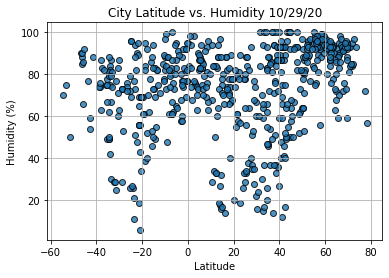

In [16]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

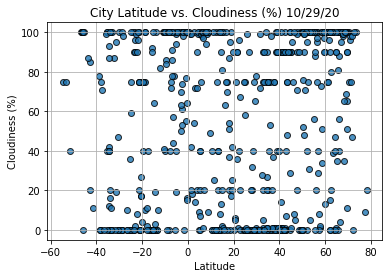

In [19]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

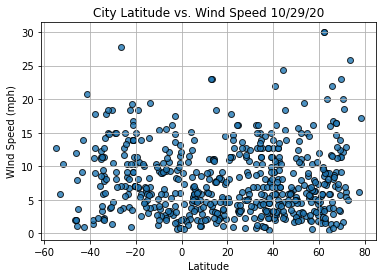

In [21]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
           wind_speed,
           edgecolor='black', linewidths=1, marker='o',
           alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f'City Latitude vs. Wind Speed '+ time.strftime('%x'))
plt.ylabel('WInd Speed (mph)')
plt.xlabel('Latitude')
plt.grid(True)
# Save the figure
plt.savefig('weather_data/Fig4.png')
# Show plot.
plt.show()